In [14]:
from alg import *
import numpy as np

In [15]:
N = [3, 4, 5, 6, 7]
K = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
repeat = 10
neighbour = 5
dataset, labels = read_all()

In [16]:
def fisherfaces():
    avg_mis_of_N = []
    for n in N:
        avg_mis = []
        for k in K:
            (train_data, train_label), (test_data, test_label) = random_select_data(dataset, labels, n)
            all_miss = []
            # 十遍，取平均
            for _ in range(repeat):
                # 先用PCA降维，获得可逆矩阵
                c = len(set(train_label))
                num = len(train_label)
                train_data, eigen, mean = Reduction.pca(train_data, num-c)
                test_data = eigen.T.dot(test_data - mean)
                # 再用LDA降维,使用KNN分类器
                train_data, wlda = Reduction.lda(train_data, train_label, k)
                test_data = wlda.T.dot(test_data)
                knn = KNN(neighbour)
                knn.fit(train_data, train_label)
                re, mis = knn.predict(test_data, test_label)
                all_miss.append(mis)
            avg_mis.append(sum(all_miss) / len(all_miss))
        avg_mis_of_N.append(avg_mis)
    return np.array(avg_mis_of_N)

In [17]:
avg_mis_of_N = fisherfaces()

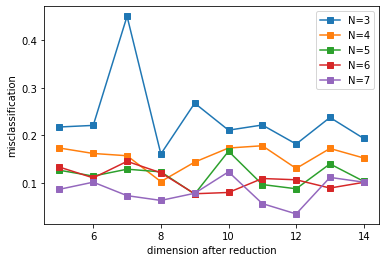

In [18]:
import matplotlib.pyplot as plt
for i, avg_mis in enumerate(avg_mis_of_N):
    plt.plot(K, avg_mis,'s-',label="N="+str(N[i]))
    plt.legend()
plt.xlabel("dimension after reduction")
plt.ylabel("misclassification")
plt.show()